### 연습할 데이터 불러오기

In [38]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
print(anscombe.shape)
print(type(anscombe))
print(anscombe.head())
print('*' * 50)
tips = sns.load_dataset('tips')
print(tips.shape)
print(type(tips))
print(tips.head())

import warnings
warnings.filterwarnings(action='ignore')

(44, 3)
<class 'pandas.core.frame.DataFrame'>
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
**************************************************
(244, 7)
<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# 1. matplotlib 

## 1.1 plot

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

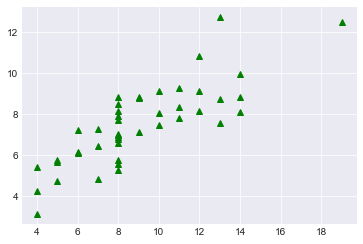

In [40]:
# 그래프 모양 옵션 ex : (bs : 파란색 + 사각형점) (r-- : 빨간색 + 대쉬) (o : 점) (g^ : 초록색 + 삼각형점)
plt.plot(anscombe['x'], anscombe['y'], 'g^');

## 1.2 그래프 여러개 그리기

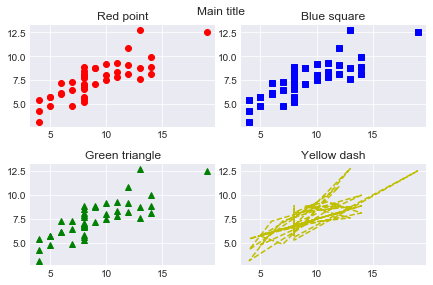

In [41]:
fig = plt.figure()                           # 1. 그래프 전체를 보여줄 판 생성
ex1 = fig.add_subplot(2,2,1)                 # 2. 부분적으로 작성할 그래프 판 생성 (행,열,위치)
ex2 = fig.add_subplot(2,2,2) 
ex3 = fig.add_subplot(2,2,3)
ex4 = fig.add_subplot(2,2,4)
ex1.plot(anscombe['x'], anscombe['y'], 'ro') # 3. 각각 지정한 개체에다 작성할 그래프 생성
ex2.plot(anscombe['x'], anscombe['y'], 'bs')
ex3.plot(anscombe['x'], anscombe['y'], 'g^')
ex4.plot(anscombe['x'], anscombe['y'], 'y--')
ex1.set_title('Red point')
ex2.set_title('Blue square')
ex3.set_title('Green triangle')
ex4.set_title('Yellow dash')
fig.suptitle('Main title');
fig.tight_layout() # 그래프들 사이의 간격 조정

## 1.3 Histogram / Scatter plot / Boxplot

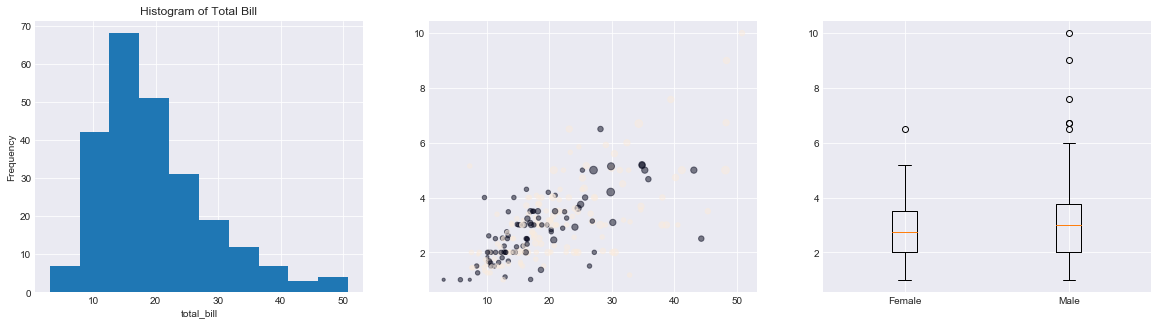

In [42]:
fig = plt.figure(figsize=(20,5))
ex1 = fig.add_subplot(1,3,1)
ex2 = fig.add_subplot(1,3,2)
ex3 = fig.add_subplot(1,3,3)
##################################################
ex1.hist(tips['total_bill'], bins=10)
ex1.set_title('Histogram of Total Bill')
ex1.set_xlabel('total_bill')
ex1.set_ylabel('Frequency')
##################################################
def recode_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)
ex2.scatter(x = tips['total_bill'], 
            y = tips['tip'], 
            s = tips['size'] * 10, 
            c = tips['sex_color'], alpha=0.5)
##################################################
ex3.boxplot([tips[tips['sex'] == 'Female']['tip'],tips[tips['sex'] == 'Male']['tip']],
            labels = ['Female', 'Male']);

# 2. seaborn

## 2.1 Histogram

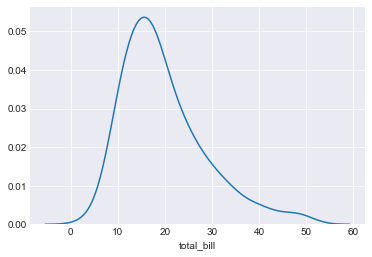

In [43]:
# 옵션 : rug / hist / kde
ex_dist = sns.distplot(tips['total_bill'], hist=False)

## 2.2 Countplot

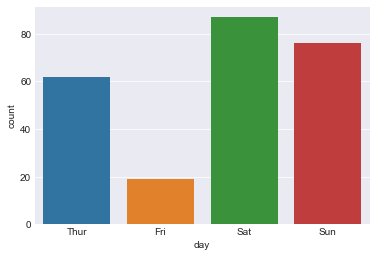

In [44]:
sns.countplot('day', data=tips);

## 2.3 regplot

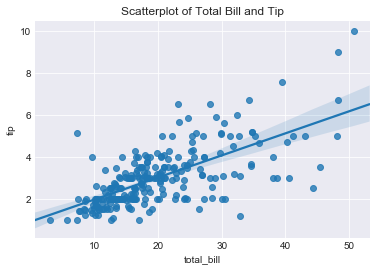

In [45]:
ex_reg = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=True)
ex_reg.set_title('Scatterplot of Total Bill and Tip');

## 2.4 jointplot

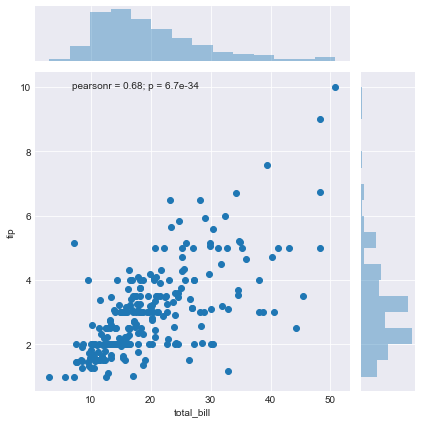

In [46]:
sns.jointplot(x='total_bill',y='tip', data=tips);

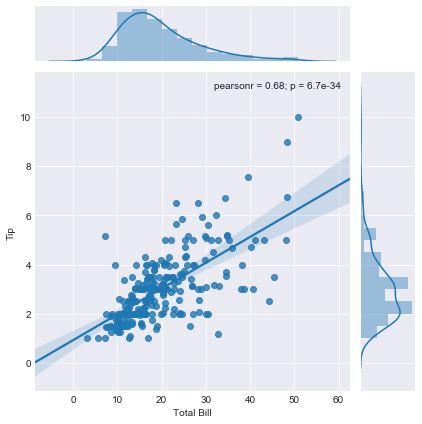

In [47]:
(sns.jointplot(x='total_bill',y='tip', data=tips, kind='reg').set_axis_labels(xlabel='Total Bill', ylabel='Tip'));

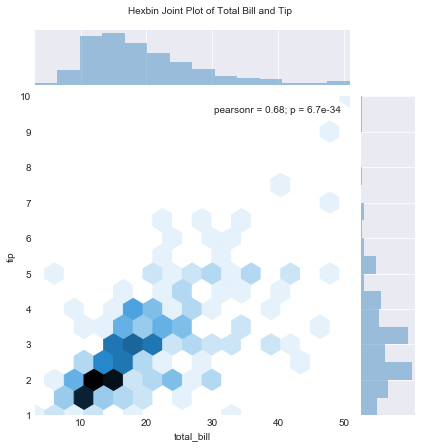

In [48]:
(sns.jointplot(x = 'total_bill', y='tip', data=tips, kind='hex').
 fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize = 10, y=1.03));

## 2.5 boxplot, violinplot

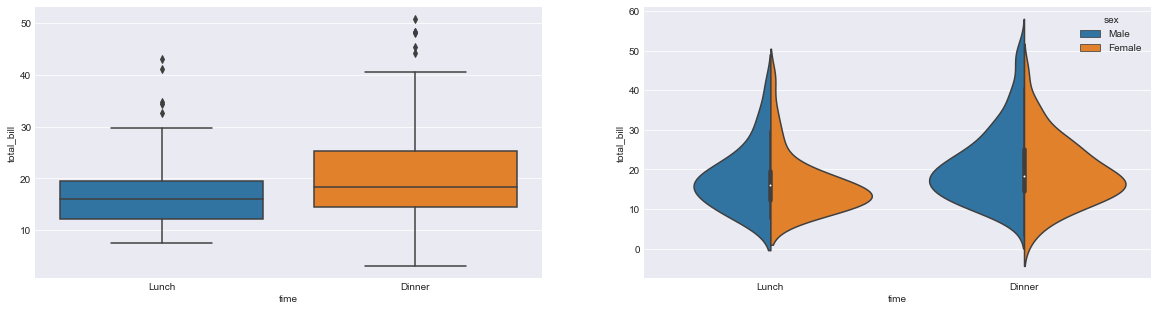

In [49]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)

sns.boxplot(x='time', y='total_bill', data=tips, ax=axes[0])
sns.violinplot(x='time', y='total_bill', hue = 'sex', data=tips, split=True, ax=axes[1]);

## 2.6 그룹별 그래프

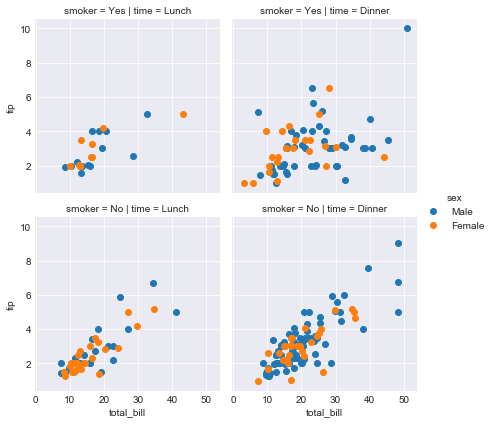

In [50]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip').add_legend();